<a href="https://colab.research.google.com/github/chiraag918/TSFGRIPS_DataScience_BusinessAnalytics/blob/main/TSFGRIPS_DS_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation - Graduate Rotational Internship Program - Data Science & Business Analytics - Task 2 - Prediction using Unsupervised ML - Chiraag A**

The main goal of this program is to use an unsupervised learning model, to predict the optimum number of clusters and visualise it graphically. We make use of the K-nearest neighbour model to find clusters in given the data set.

In [1]:
# Reqd. libraries are imported

from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Loading and Visualising the data as a table

iris_data = load_iris()
iris_spec = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_spec.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


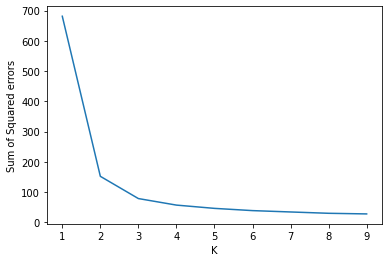

In [3]:
# Using elbow method to find the ideal k value
# We plot the sum of square errors for different values of k

sum_sq_err = []
k_set = range(1,10)
for k in k_set:
    km = KMeans(n_clusters=k)
    km.fit(iris_spec)
    sum_sq_err.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Squared errors')
plt.plot(k_set,sum_sq_err)

In [4]:
# Training and fitting our KMeans model and predicting the clusters

km = KMeans(n_clusters=3)
prediction = km.fit_predict(iris_spec)


In [5]:
# Adding a column cluster into our dataframe to help distinguish each data point based on the 4 features

iris_spec['cluster'] = prediction
iris_spec.cluster.unique()
iris_spec

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [6]:
# Seperating the data points based on cluster class

iris_spec1 = iris_spec[iris_spec.cluster==0]
iris_spec2 = iris_spec[iris_spec.cluster==1]
iris_spec3 = iris_spec[iris_spec.cluster==2]

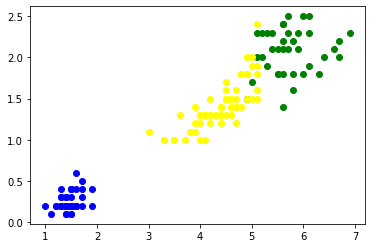

In [7]:
# Visualisation of 3 clusters in our dataframe

plt.scatter(iris_spec1['petal length (cm)'],iris_spec1['petal width (cm)'],color='blue')
plt.scatter(iris_spec2['petal length (cm)'],iris_spec2['petal width (cm)'],color='green')
plt.scatter(iris_spec3['petal length (cm)'],iris_spec3['petal width (cm)'],color='yellow')

From the above figure we can see that there are three kinds of flowers in our dataset